<a href="https://colab.research.google.com/github/Dynamo-Dream/ShapleyCarClassifier/blob/main/ShapleyCarClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [ ]:
columns = ["Buy_Price","Maintenance_Cost","No_of_doors","No_of_persons","Lug_boot","Necessary","y"]
df = pd.read_csv("/content/car_evaluation.csv", header = None, names=columns)
df.head()

,Buy_Price,Maintenance_Cost,No_of_doors,No_of_persons,Lug_boot,Necessary,y
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.isna().sum()

Buy_Price           0
Maintenance_Cost    0
No_of_doors         0
No_of_persons       0
Lug_boot            0
Necessary           0
y                   0
dtype: int64

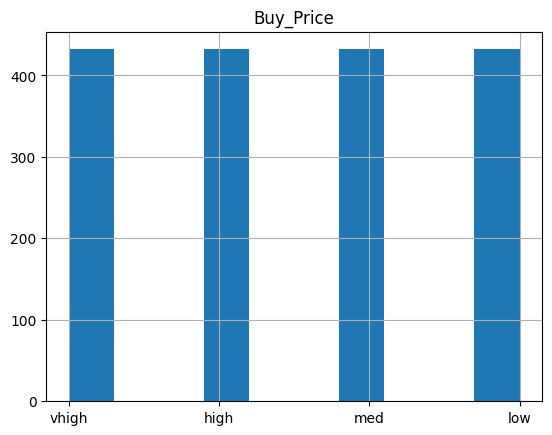

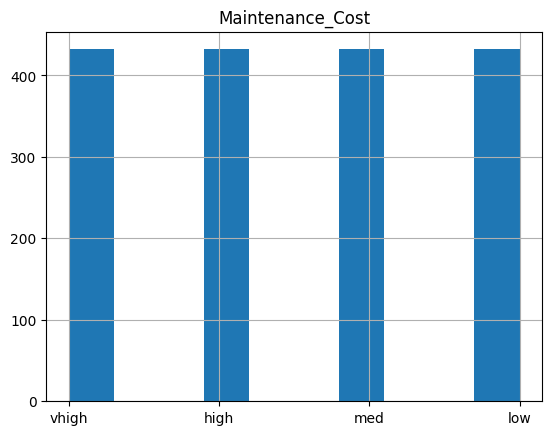

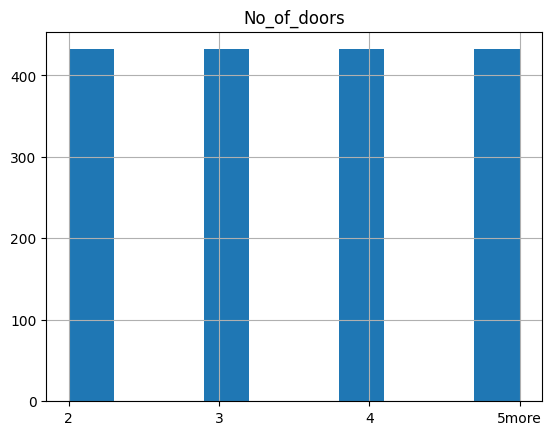

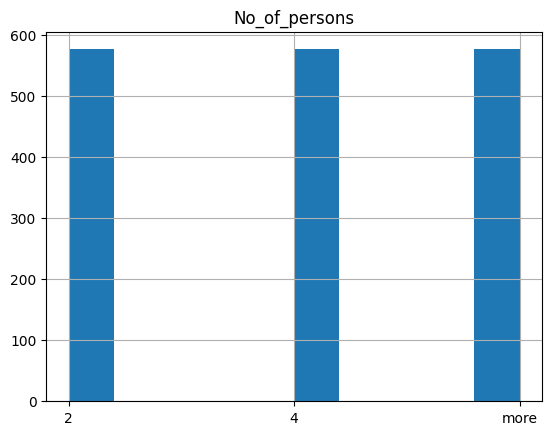

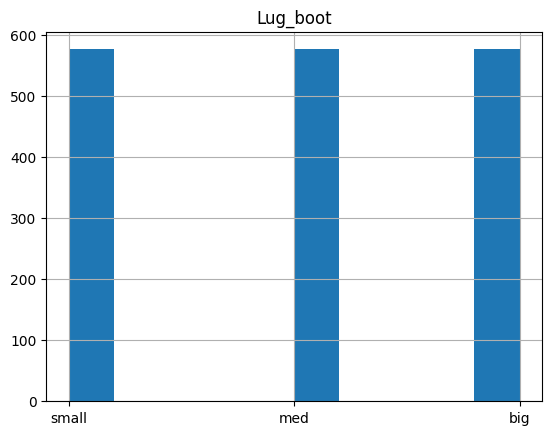

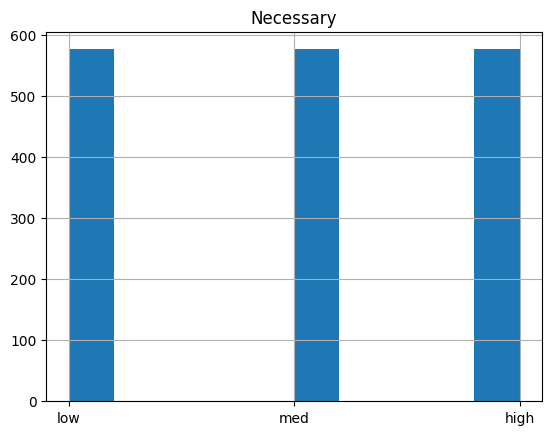

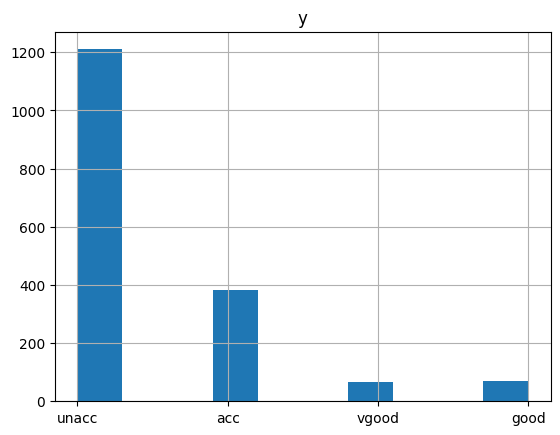

In [ ]:
for i in columns:
  df[i].hist()
  plt.title(i)
  plt.show()

In [ ]:
df.describe()

,Buy_Price,Maintenance_Cost,No_of_doors,No_of_persons,Lug_boot,Necessary,y
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
x = df.drop("y",axis=1)
y = df["y"]

In [ ]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: y, Length: 1728, dtype: object

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=0,train_size=0.8)

In [ ]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [ ]:
# Feature Engineering Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.
X_train.dtypes


Buy_Price           object
Maintenance_Cost    object
No_of_doors         object
No_of_persons       object
Lug_boot            object
Necessary           object
dtype: object

In [ ]:
X_train.head()

,Buy_Price,Maintenance_Cost,No_of_doors,No_of_persons,Lug_boot,Necessary
1649,low,low,3,2,small,high
1465,low,high,4,2,big,med
361,vhigh,low,3,4,small,med
315,vhigh,med,5more,more,small,low
1372,low,vhigh,4,more,med,med


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=["Buy_Price","Maintenance_Cost","No_of_doors","No_of_persons","Lug_boot","Necessary"])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Buy_Price,Maintenance_Cost,No_of_doors,No_of_persons,Lug_boot,Necessary
1649,1,1,1,1,1,1
1465,1,2,2,1,2,2
361,2,1,1,2,1,2
315,2,3,3,3,1,3
1372,1,4,2,3,3,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7861


[Text(0.6, 0.875, 'x[5] <= 2.5\ngini = 0.456\nsamples = 1382\nvalue = [305, 52, 970, 55]'),
 Text(0.4, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 912\nvalue = [305, 52, 500, 55]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 308\nvalue = [0, 0, 308, 0]'),
 Text(0.6, 0.375, 'x[1] <= 3.5\ngini = 0.628\nsamples = 604\nvalue = [305, 52, 192, 55]'),
 Text(0.4, 0.125, 'gini = 0.625\nsamples = 467\nvalue = [255, 52, 105, 55]'),
 Text(0.8, 0.125, 'gini = 0.464\nsamples = 137\nvalue = [50, 0, 87, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 470\nvalue = [0, 0, 470, 0]')]

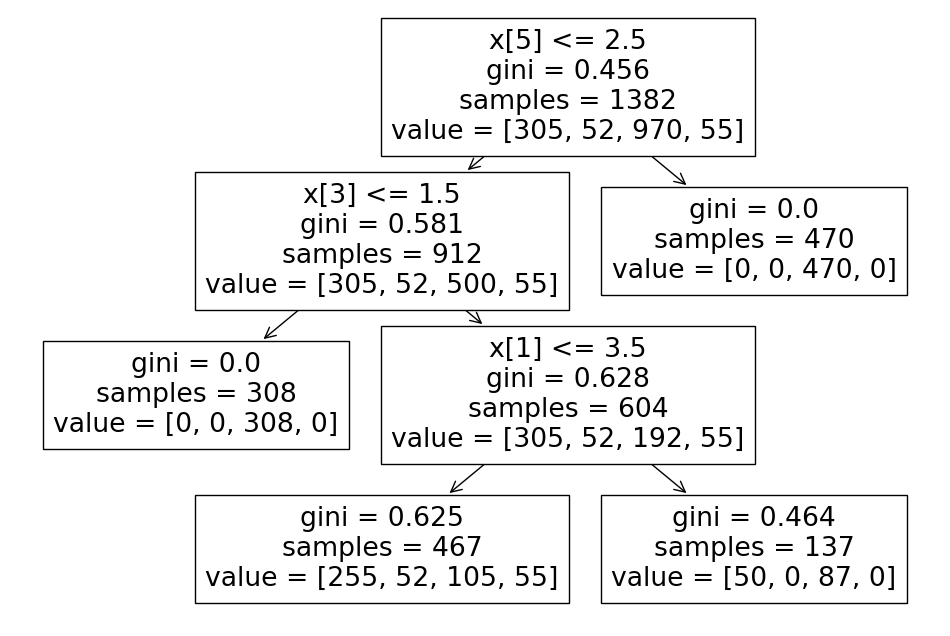

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, Y_train))

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 9.7 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(clf_gini)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

,Buy_Price,Maintenance_Cost,No_of_doors,No_of_persons,Lug_boot,Necessary
124,2,2,4,2,2,2


In [ ]:
print(shap_values[0].shape)
shap_values

(1, 6)


[array([[0.        , 0.02872476, 0.        , 0.1476875 , 0.        ,
         0.14893164]]),
 array([[0.        , 0.01766381, 0.        , 0.02791244, 0.        ,
         0.02814616]]),
 array([[ 0.        , -0.06507144,  0.        , -0.20512271,  0.        ,
         -0.20684779]]),
 array([[0.        , 0.01868287, 0.        , 0.02952277, 0.        ,
         0.02976998]])]

In [ ]:
shap.initjs()
# Force plot
prediction = clf_gini.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index])

The RF predicted: acc
